 # PROYECTO DE ANALISIS PARA EL INDICE S&P500

#### ¿Que es?

El índice S&P 500 (Standard & Poor's 500 Index) 
* Es un índice bursátil que mide el rendimiento de las 500 mayores empresas cotizadas en bolsa de Estados Unidos. 
* Se considera uno de los índices bursátiles más importantes y ampliamente seguidos a nivel mundial.
* se compone de acciones de empresas de diversos sectores, incluyendo tecnología, finanzas, servicios públicos y consumo.
* El rendimiento del índice se calcula como el cambio en el precio de las acciones incluidas en el índice, incluyendo dividendos.
* se utiliza como un indicador del rendimiento general del mercado de valores de Estados Unidos y como una medida del rendimiento del mercado laboral y la economía en general.

#### Objetivos

**Evaluar y determinar las empresas mas rentables para invertir**
* Describir cuales son las empresas mas influyentes
* Evidenciar el nivel del indice de las empresas a lo largo del tiempo

## PARTE 1: WEB SCRAPING (Datos sacados el 06/01/23)

#### Importacion de librerias

In [10]:
from selenium import webdriver
import pandas as pd
import time

#### Identificacion de url

In [11]:
website = 'https://es.investing.com/indices/investing.com-us-500-components'
path = "C:/Users/chris/Desktop/estudio 1/Dancito/PYTHON/Chromedriver/chromedriver.exe"

In [12]:
driver = webdriver.Chrome(path)
driver.get(website)

C:\Users\chris\AppData\Local\Temp\ipykernel_15232\1494208203.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


#### Recopilacion de los datos

In [14]:
execution= driver.find_element('xpath','.//div[@class="js-stock-filter-buttons"]/a[@id="filter_performance"]')
execution.click()

In [15]:
rows = driver.find_elements('xpath','.//table[@id="marketsPerformance"]/tbody/tr')

In [16]:
nombre = []
diario = []
semanal = []
mensual = []
anual = []
one_ano = []
three_ano = []

for row in rows:

    nombre.append(row.find_element('xpath', './td[2]').text)
    diario.append(row.find_element('xpath', './td[3]').text)
    semanal.append(row.find_element('xpath', './td[4]').text)
    mensual.append(row.find_element('xpath', './td[5]').text)
    anual.append(row.find_element('xpath', './td[6]').text)
    one_ano.append(row.find_element('xpath', './td[7]').text)
    three_ano.append(row.find_element('xpath', './td[8]').text)

#### Pasando los datos a un CSV

In [18]:
# pandas

df = pd.DataFrame( {'nombre': nombre, 'diario': diario, 'semanal': semanal, 'mensual': mensual,
                   'anual': anual, '1año': one_ano, '3año': three_ano})

df.to_excel('S&P5002.xlsx', index = False)

los cambios de % a numeros decimales se hicieron en excel ya que es mas facil y comodo reemplazarlos en esa plataforma que en python

### Explicacion De La Base De Datos

In [19]:
data = pd.read_excel('S&P5002.xlsx')
data

nombre  diario  semanal  mensual   anual    1año    3año
0                     3M  0.0306   0.0567   0.0057  0.0567 -0.2958 -0.2985
1            Abbott Labs  0.0138   0.0231   0.0506  0.0231 -0.1714   0.303
2                 AbbVie  0.0187   0.0306   0.0034  0.0306  0.2348  0.8605
3              Accenture  0.0237   0.0089  -0.0785  0.0089 -0.2739  0.3175
4    Activision Blizzard  0.0082   0.0136   0.0379  0.0136  0.2116  0.2958
..                   ...     ...      ...      ...     ...     ...     ...
492          Yum! Brands  0.0203   0.0173   0.0034  0.0173 -0.0374  0.2755
493                Zebra  0.0514   0.0663   0.0815  0.0663 -0.4849  0.1041
494        Zimmer Biomet -0.0030  -0.0141  -0.0011 -0.0141  0.0111 -0.1597
495                Zions  0.0387   0.0427   0.0819  0.0427 -0.2687       0
496           Zoetis Inc  0.0151   0.0074  -0.0393  0.0074 -0.3006  0.1077

[497 rows x 7 columns]

#### Explicación de las variables

**nombre =** nombre de la empresa

**diario =** % de variacion diaria

**semanal =** % de variacion semanal

**mensual =** % de variacion mensual

**anual =** % de variacion anual

**1año =** % de variacion hace 1 año

**3año =** % de variacion hace 3 años

## PARTE 2: LIMPIEZA DE DATOS

In [20]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nombre   497 non-null    object 
 1   diario   497 non-null    float64
 2   semanal  497 non-null    float64
 3   mensual  497 non-null    float64
 4   anual    497 non-null    float64
 5   1año     497 non-null    object 
 6   3año     497 non-null    object 
dtypes: float64(4), object(3)
memory usage: 27.3+ KB


se observa que todas las columnas tienen la misma cantidad de datos por lo que no tienen datos nulos, ademas de observarse algunas columnas categoricas las cuales hay que cambiarlas a numericas

### Columnas irrelevantes

In [21]:
import mitosheet
mitosheet.sheet(data, analysis_to_replay="id-ozypvyhrlq")

In [22]:
from mitosheet import *; register_analysis("id-ozypvyhrlq");
    
# Changed 1año to dtype float
data['1año'] = to_float_series(data['1año'])

# Changed 3año to dtype float
data['3año'] = to_float_series(data['3año'])


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nombre   497 non-null    object 
 1   diario   497 non-null    float64
 2   semanal  497 non-null    float64
 3   mensual  497 non-null    float64
 4   anual    497 non-null    float64
 5   1año     496 non-null    float64
 6   3año     493 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.3+ KB


In [24]:
# Conteo de los niveles en las diferentes columnas numericas
cols_num = data.drop(labels = ['nombre'], axis=1)
cols_num.describe()

diario     semanal     mensual       anual        1año        3año
count  497.000000  497.000000  497.000000  497.000000  496.000000  493.000000
mean     0.024038    0.029272    0.004852    0.029272   -0.102194    0.274836
std      0.016152    0.039818    0.060311    0.039818    0.241402    0.672827
min     -0.078400   -0.118200   -0.348100   -0.118200   -0.682000   -0.811300
25%      0.016100    0.006800   -0.029800    0.006800   -0.265175   -0.034900
50%      0.025400    0.026800    0.004200    0.026800   -0.111900    0.204000
75%      0.032900    0.052400    0.044000    0.052400    0.040900    0.431700
max      0.072600    0.194100    0.189400    0.194100    0.919600    9.030600

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

### Filas repetidas

In [25]:
# determinar columnas categoricas
col_name_without_numeric_data = list(data.select_dtypes(exclude=('int', 'float')).columns)
print(f'columnas sin datos numericos: {", ".join(col_name_without_numeric_data)}.')

columnas sin datos numericos: nombre.


In [26]:
# ver duplicados por columnas
for col in col_name_without_numeric_data:
    if data[col].duplicated().any() == True:
        print (f'Column {col} contiene duplicados.')
    else:
        print (f'Column {col} no contiene duplicados.')

Column nombre no contiene duplicados.


In [27]:
# examinar si hay espacios extras 
for col in col_name_without_numeric_data:
    print(f'Antes {col}: {len(set(data[col]))} Despues {col}: {len(set(data[col].str.title().str.strip()))}')

Antes nombre: 497 Despues nombre: 497


In [28]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (497, 7)
Tamaño del set después de eliminar las filas repetidas: (497, 7)


### Datos faltantes

In [29]:
missing_data = data.isnull()
missing_data.head(10)

nombre  diario  semanal  mensual  anual   1año   3año
0   False   False    False    False  False  False  False
1   False   False    False    False  False  False  False
2   False   False    False    False  False  False  False
3   False   False    False    False  False  False  False
4   False   False    False    False  False  False  False
5   False   False    False    False  False  False  False
6   False   False    False    False  False  False  False
7   False   False    False    False  False  False  False
8   False   False    False    False  False  False  False
9   False   False    False    False  False  False  False

se convierten los valores nulos a True y los que no son nulos a False para contar la cantidad de nulos que hay por columna

In [30]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

nombre
False    497
Name: nombre, dtype: int64

diario
False    497
Name: diario, dtype: int64

semanal
False    497
Name: semanal, dtype: int64

mensual
False    497
Name: mensual, dtype: int64

anual
False    497
Name: anual, dtype: int64

1año
False    496
True       1
Name: 1año, dtype: int64

3año
False    493
True       4
Name: 3año, dtype: int64



In [31]:
# % de datos perdidos
for col in data.columns:
    pct_missing = data[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

nombre - 0.0%
diario - 0.0%
semanal - 0.0%
mensual - 0.0%
anual - 0.0%
1año - 0.2%
3año - 0.8%


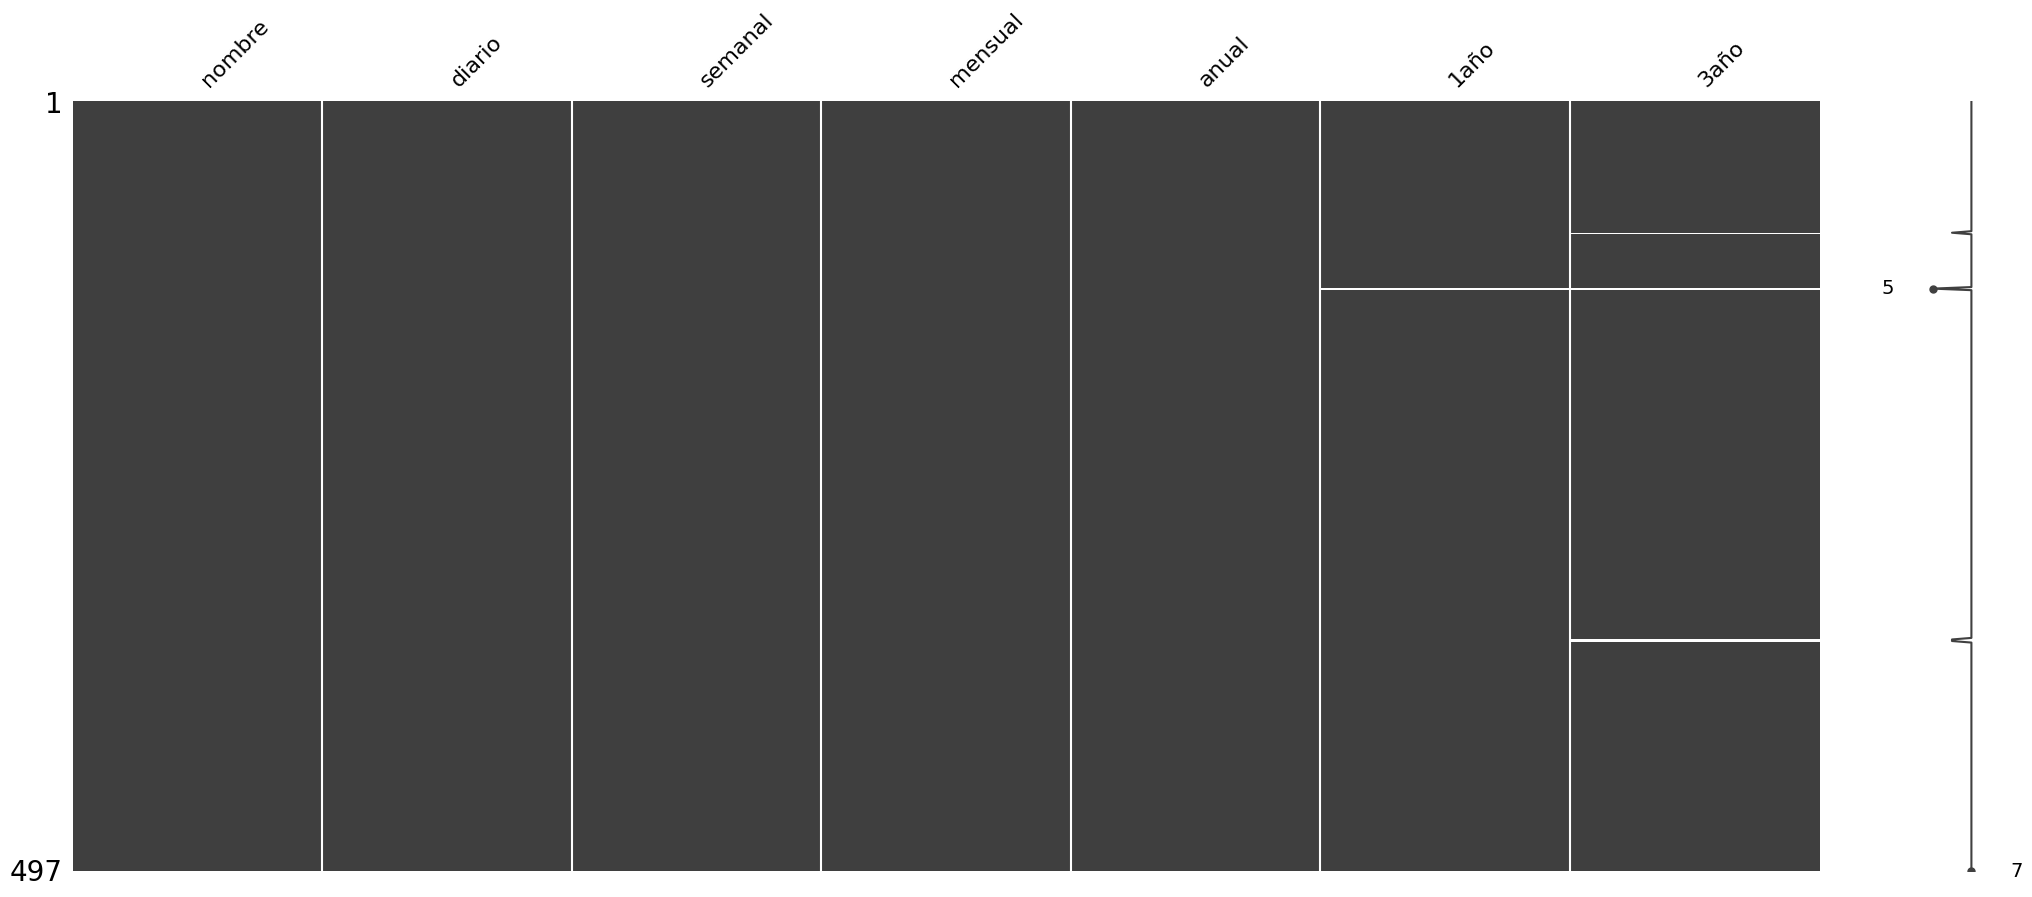

In [32]:
# grafico de datos perdidos
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
# Build a matrix of missing values
missingno.matrix(data, fontsize = 16)
plt.show()

Se observa como hay que cambiar valores de las variables ya que tienen valores nulos
* 1año
* 3año

1año y 3año al ser poco se reemplazan por la mediana para que no se vean afectados por los outliers

In [33]:
# sacar mediana de variable 1año
median_1año = data["1año"].astype("float").median(axis=0)
print("mediana de 1año:", median_1año)

mediana de 1año: -0.1119


In [34]:
import numpy as np
# reemplazar NA por mediana
data["1año"].replace(np.nan, median_1año, inplace=True)

In [35]:
# sacar mediana de variable 3año
median_3año = data["3año"].astype("float").median(axis=0)
print("mediana de 3año:", median_3año)

mediana de 3año: 0.204


In [36]:
# reemplazar NA por mediana
data["3año"].replace(np.nan, median_3año, inplace=True)

In [37]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

nombre
False    497
Name: nombre, dtype: int64

diario
False    497
Name: diario, dtype: int64

semanal
False    497
Name: semanal, dtype: int64

mensual
False    497
Name: mensual, dtype: int64

anual
False    497
Name: anual, dtype: int64

1año
False    497
Name: 1año, dtype: int64

3año
False    497
Name: 3año, dtype: int64



In [38]:
# % de datos perdidos
for col in data.columns:
    pct_missing = data[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

nombre - 0.0%
diario - 0.0%
semanal - 0.0%
mensual - 0.0%
anual - 0.0%
1año - 0.0%
3año - 0.0%


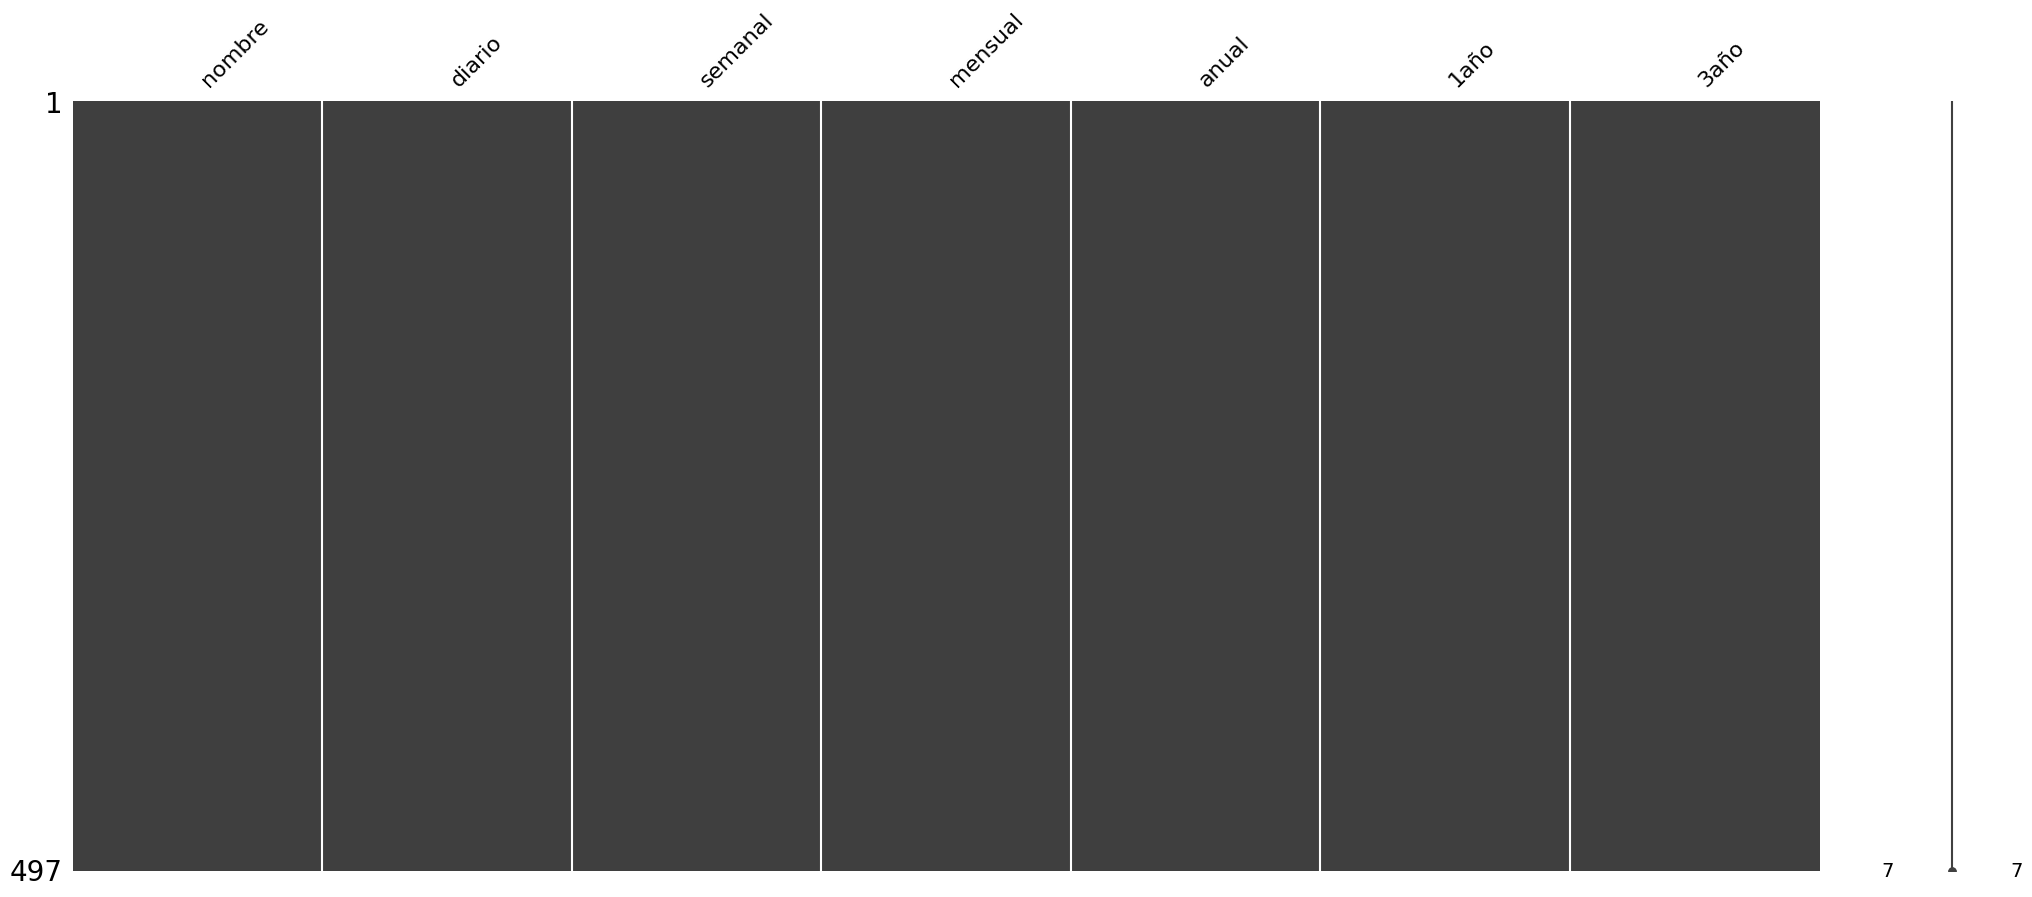

In [39]:
# grafico de datos perdidos
import missingno
# Build a matrix of missing values
missingno.matrix(data, fontsize = 16)
plt.show()

el dataset ya no tiene datos nulos

### Outliers en las variables numéricas

In [40]:
cols_num.columns.values.tolist()

['diario', 'semanal', 'mensual', 'anual', '1año', '3año']

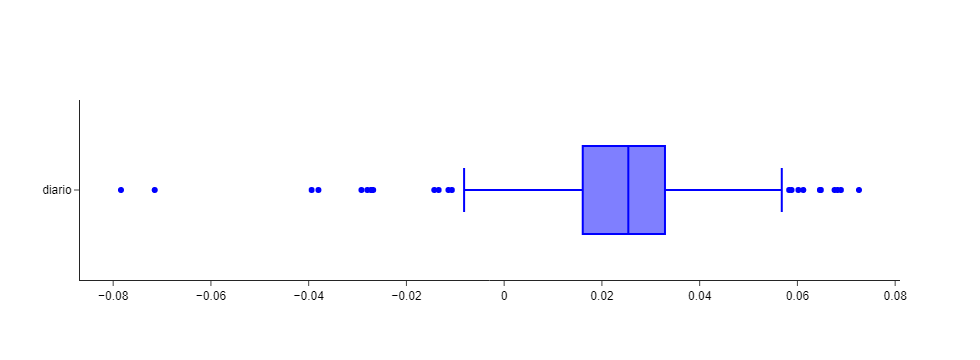

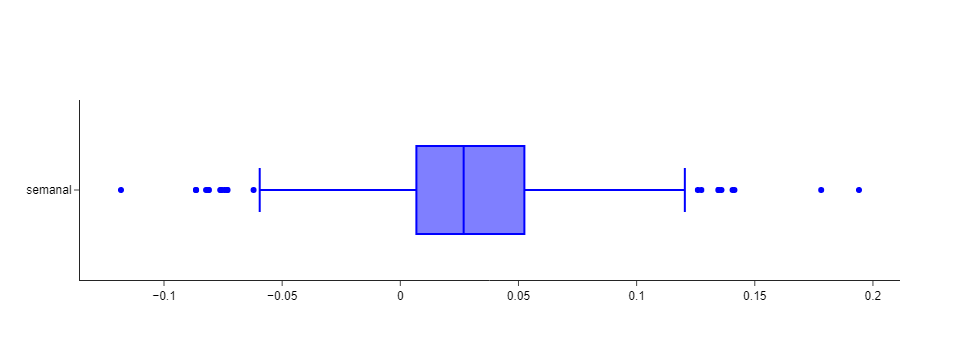

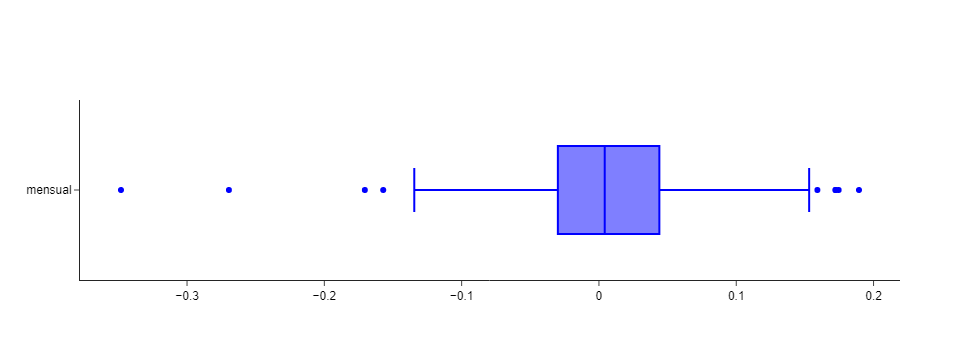

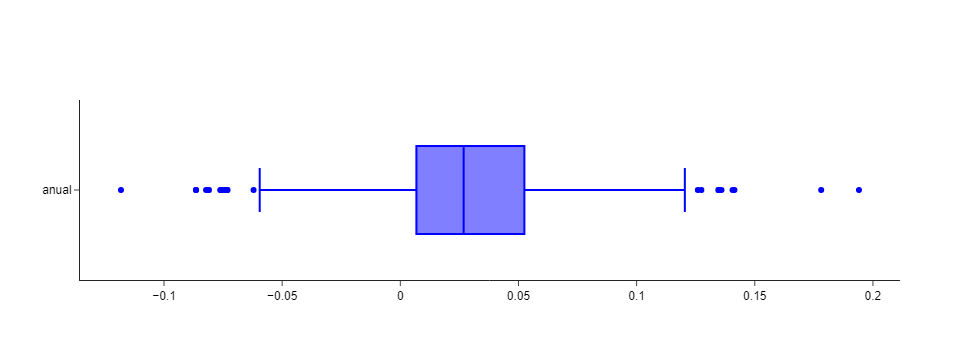

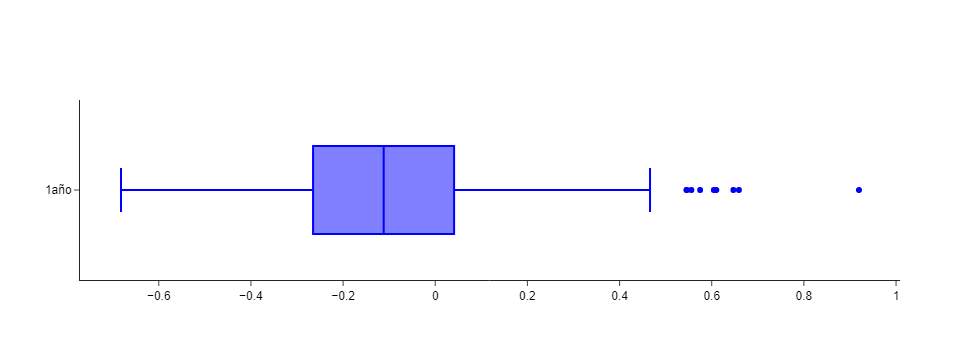

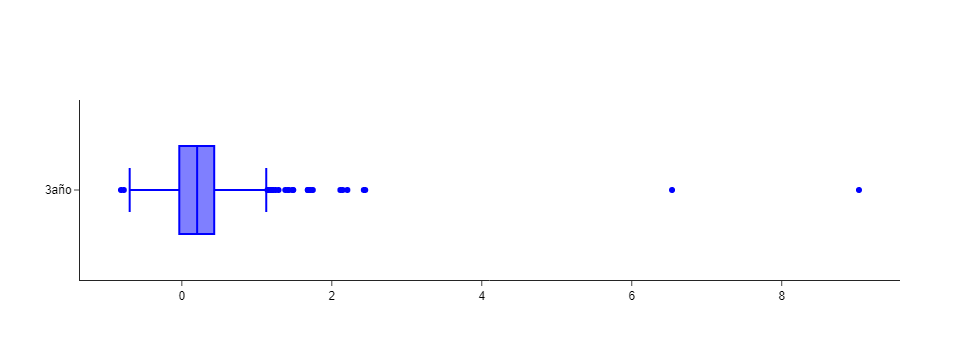

In [41]:
# librerias
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# graffico de caja

for i, col in enumerate(cols_num):
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])
    fig.add_trace(go.Box(x=data[col], 
                       name=col))

# configuracion del grafico al visualizar
    fig.update_traces(marker_color='Blue')

# configuracion de los paramteros del boxplot
    fig.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

    fig.show()

INSIGHTS: Al analizar los datos numericos se concluye que:

diario:
los datos no se distribuyen normalmente. Se observa una asimetria negativa
la mediana es 0,025
Hay valores atipicos que sobrepasan el 1.5*RIC que es -0,0082 por la izquierda y 0,0568 por la derecha

semanal:
los datos no se distribuyen normalmente. Se observa una asimetria positiva
la mediana es 0,0268
Hay valores atipicos

mensual:
los datos no se distribuyen normalmente. Se observa una asimetria positiva
la mediana es 0,0042
Hay valores atipicos

1año:
los datos visualmente se distribuyen normalmente pero esta sujeta a pruebas posteriores.
la mediana y el promedio podrian ser iguales
Hay valores atipicos

3año:
los datos visualmente se distribuyen normalmente pero esta sujeta a pruebas posteriores.
la mediana y el promedio podrian ser iguales
Hay valores atipicos

Se concluye:
No es necesario quitar los outliers porque no es factible quitar informacion para analizar la rentabilidad de todas las empresas

### Analisis Del Dataset

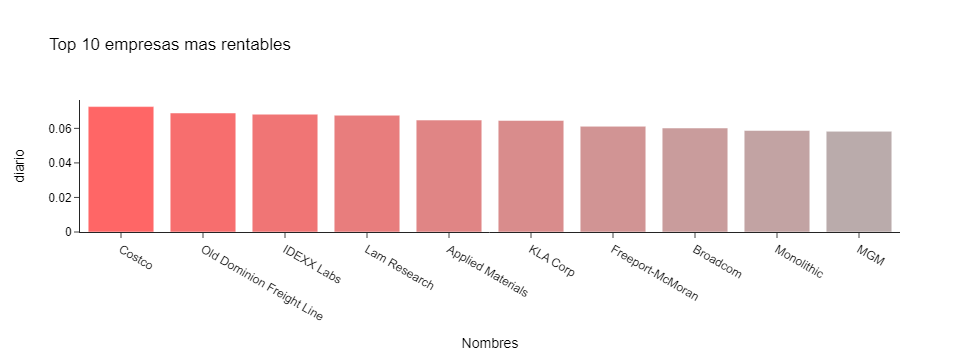

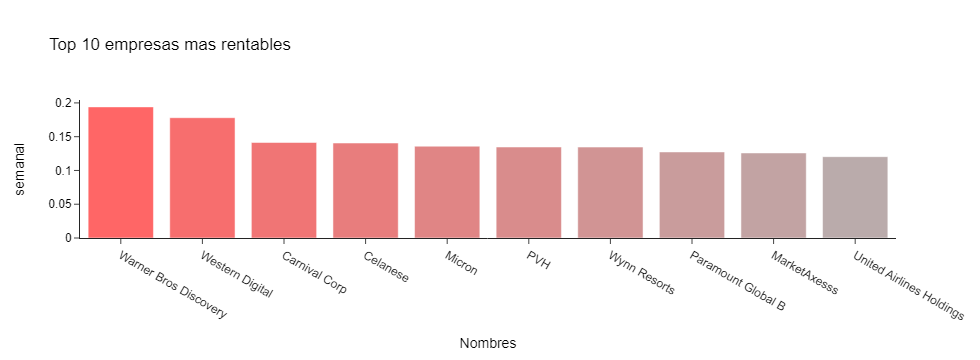

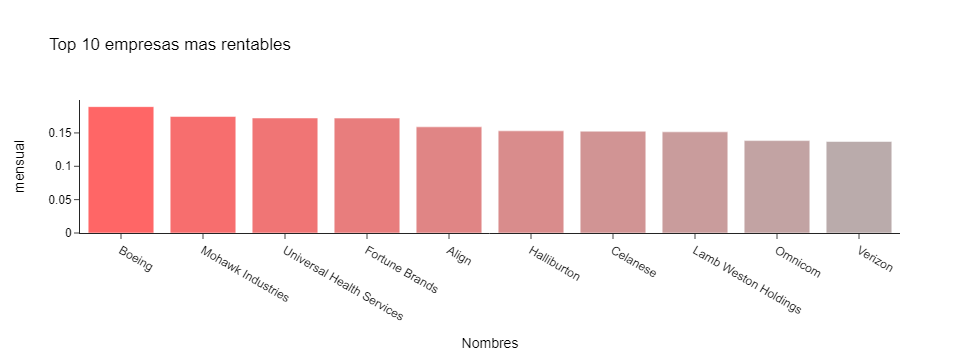

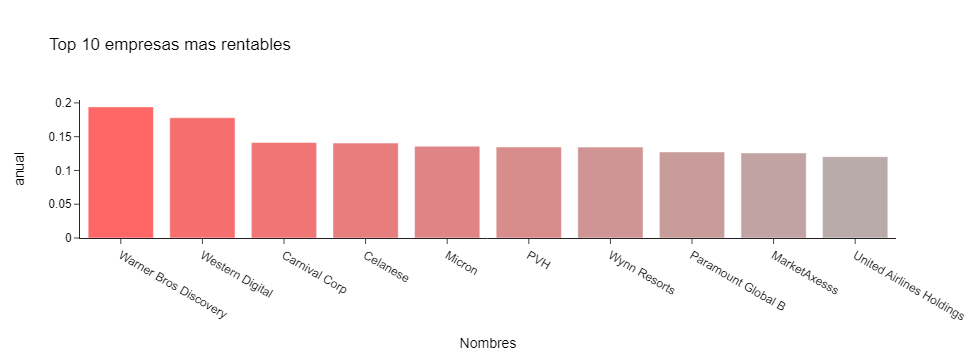

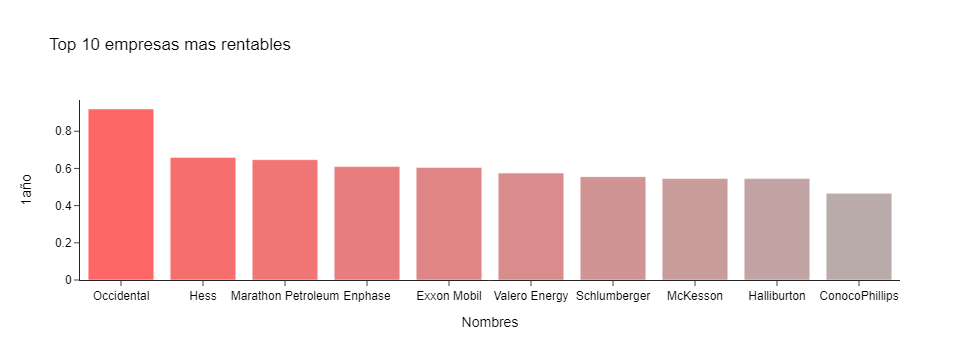

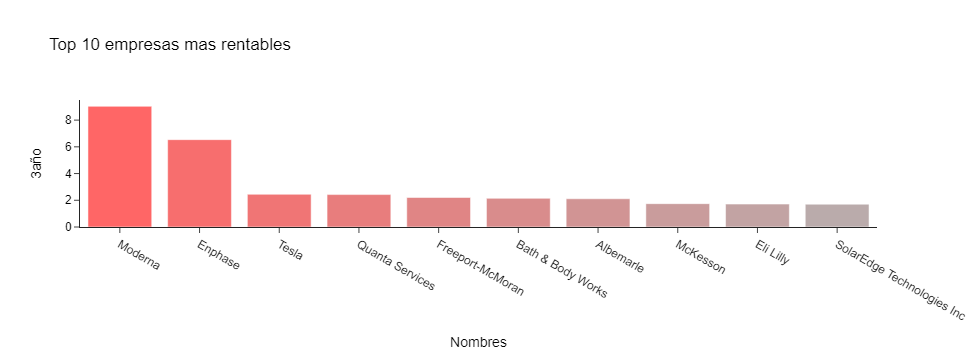

In [42]:

for a, col1 in enumerate(cols_num):
    top_10 = data.nlargest(10,col1)

    fig_2 = make_subplots(rows=1, cols=1,specs=[[{'type': 'xy'}]])

    fig_2.add_trace(go.Bar(x=top_10['nombre'], 
                       y=top_10[col1],
                       marker_color=['#ff6666','#f76e6e', '#f07575', '#e87d7d', '#e08585',
                                     '#d98c8c', '#d19494', '#c99c9c', '#c2a3a3', '#baabab']),
                       row=1, col=1)


    fig_2.update_layout(title_text='Top 10 empresas mas rentables',
                    template='simple_white',
                    showlegend=False, 
                    plot_bgcolor='rgba(0,0,0,0)',   
                    xaxis = {'title':'Nombres'}, 
                    yaxis = {'title':col1},
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))
    fig_2.show()

Empresas con mayor indice

diario:
* Costco
* Old Dominion
* IDEXX LABS

semanal:
* Warner Bros
* Western Digital
* Carnival Corp

mensual:
* Boeing
* Mohawk Industries
* Universal Health

Anual:
* Warner Bros
* Western Digital
* Carnival Corp

1año:
* Occidental
* Hess
* Marathon Petroleum

3año:
* Moderna
* Enphase
* Tesla

In [43]:
# matriz de correlacion para analizar variables
corr = data.corr()
corr

C:\Users\chris\AppData\Local\Temp\ipykernel_15232\3304801113.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



diario   semanal   mensual     anual      1año      3año
diario   1.000000  0.429204  0.177444  0.429204 -0.121196 -0.025339
semanal  0.429204  1.000000  0.638813  1.000000 -0.291242 -0.294083
mensual  0.177444  0.638813  1.000000  0.638813 -0.003798 -0.285034
anual    0.429204  1.000000  0.638813  1.000000 -0.291242 -0.294083
1año    -0.121196 -0.291242 -0.003798 -0.291242  1.000000  0.363739
3año    -0.025339 -0.294083 -0.285034 -0.294083  0.363739  1.000000

<AxesSubplot: >

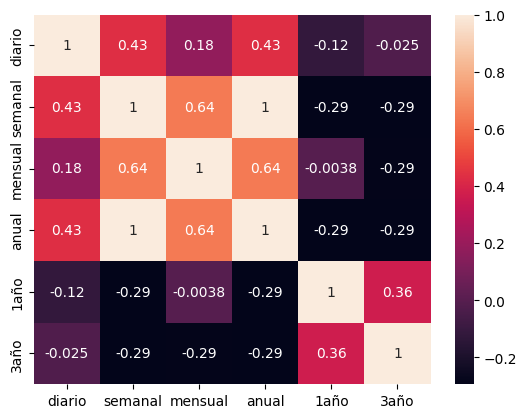

In [44]:
# Grafico de calor
sns.heatmap(corr, annot=True)

Se observa que no hay variables que tengan un alto nivel de correlacion por lo cual no dependen entre ellas

### PRUEBA DE HIPÓTESIS

Probemos la siguiente hipótesis: "¿La variable 1año y 3año se distribuye normalmente?".

Probar la hipótesis de acuerdo con el siguiente algoritmo:

* Se formulan hipótesis nulas y alternativas.
* Se comprobó la normalidad de la distribución utilizando la "prueba de normalidad de Shapiro Wilk".

* H0: los datos se distribuyen normalmente
* H1: los datos no se distribuyen normalmente

In [45]:
from scipy.stats import shapiro
# nivel del alpha
alpha=0.05

# agrupamos los valores
stat, pval = shapiro(data['1año'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
    
# verificar si se rechaza  o no la hipotesis nula
if pval > alpha:
    print('no rechazar H0 - variable 1año se distribuye normalmente.')
if pval < alpha:
    print('rechazar  H0 - variable 1año no se distribuye normalmente.')

Statistic: 0.987
P-Value: 0.00021184539946261793
rechazar  H0 - variable 1año no se distribuye normalmente.


In [46]:
# nivel del alpha
alpha=0.05

# agrupamos los valores
stat, pval = shapiro(data['3año'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
    
# verificar si se rechaza  o no la hipotesis nula
if pval > alpha:
    print('no rechazar H0 - variable 3año se distribuye normalmente.')
if pval < alpha:
    print('rechazar  H0 - variable 3año no se distribuye normalmente.')

Statistic: 0.616
P-Value: 0.00000000000000000000
rechazar  H0 - variable 3año no se distribuye normalmente.


se concluye que las variables 1año y 3año no se distribuyen normalmente y por lo cual ninguna de las variables numericas se distribuye normalmente

### CONCLUSIÓN

Se determina que la variacion en el indice de las empresas varia en funcion del tiempo, en donde algunas empresas se repiten en el tiempo respecto a si el indice varia semanalmente o anualmente como Warner Bros. Para invertir variables de tiempo como semanalmente o mensualmente serian las mejores para evaluar a que invertir segun esto Warner Bros, Western Digital,Carnival Corp, Boeing, Mohawk Industries, Universal Health, serian los mas optimos pero debido a que el dataframe no muestra las variaciones diarias del indice por empresa es que no se pueden tomar variables como la volatilidad por lo cual invertir solo con las conclusiones previas de estos datos seria muy apresurado.

### Dashboard

In [47]:
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [48]:
df = data
df

nombre  diario  semanal  mensual   anual    1año    3año
0                     3M  0.0306   0.0567   0.0057  0.0567 -0.2958 -0.2985
1            Abbott Labs  0.0138   0.0231   0.0506  0.0231 -0.1714  0.3030
2                 AbbVie  0.0187   0.0306   0.0034  0.0306  0.2348  0.8605
3              Accenture  0.0237   0.0089  -0.0785  0.0089 -0.2739  0.3175
4    Activision Blizzard  0.0082   0.0136   0.0379  0.0136  0.2116  0.2958
..                   ...     ...      ...      ...     ...     ...     ...
492          Yum! Brands  0.0203   0.0173   0.0034  0.0173 -0.0374  0.2755
493                Zebra  0.0514   0.0663   0.0815  0.0663 -0.4849  0.1041
494        Zimmer Biomet -0.0030  -0.0141  -0.0011 -0.0141  0.0111 -0.1597
495                Zions  0.0387   0.0427   0.0819  0.0427 -0.2687  0.0000
496           Zoetis Inc  0.0151   0.0074  -0.0393  0.0074 -0.3006  0.1077

[497 rows x 7 columns]

In [49]:
idf = df.interactive()

In [50]:
vari_pipeline = (
    idf[['nombre','diario', 'semanal', 'mensual', 'anual','1año','3año']]
    .sort_values(by='nombre')  
    .reset_index(drop=True)
)

In [51]:
vari_pipeline

In [52]:
vari_table = vari_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 20, sizing_mode='stretch_width', height=700) 
vari_table

In [53]:
# boton variables
yaxis_vari = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['diario', 'semanal', 'mensual', 'anual'],
    button_type='success'
)

In [54]:
vari_pipeline1 = (
    idf[:]
    .sort_values(by=yaxis_vari, ascending = False).head(10)  
    .reset_index(drop=True)
)

top_10_bar = vari_pipeline1.hvplot(kind='bar', width=700,
                                                     x='nombre', 
                                                     y=yaxis_vari, 
                                                     title='Top 10 empresas con mayor indice')
top_10_bar

In [55]:
vari_pipeline2 = (
    idf[:]
    .sort_values(by=yaxis_vari)  
    .reset_index(drop=False)
)

var_box = vari_pipeline2.hvplot( kind = 'box' ,height=400,
                                                     x='nombre', 
                                                     y=yaxis_vari, 
                                                     title='Caracteristicas de las empresas por fecha')
var_box

#### Creating Dashboard

In [56]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Dashboard Analisis Indice S&P500', 
    sidebar=[pn.pane.Markdown("# Indice S&P500"), 
             pn.pane.Markdown("#### El índice S&P 500 (Standard & Poor's 500 Index) es un índice bursátil que mide el rendimiento de las 500 mayores empresas cotizadas en bolsa de Estados Unidos. Se considera uno de los índices bursátiles más importantes y ampliamente seguidos a nivel mundial. Se compone de acciones de empresas de diversos sectores, incluyendo tecnología, finanzas, servicios públicos y consumo. El rendimiento del índice se calcula como el cambio en el precio de las acciones incluidas en el índice, incluyendo dividendos. Se utiliza como un indicador del rendimiento general del mercado de valores de Estados Unidos y como una medida del rendimiento del mercado laboral y la economía en general."),                   
             pn.pane.PNG('1.png', sizing_mode='scale_both')],
    main=[pn.Column(yaxis_vari,pn.Row(pn.Column(pn.Row(var_box.panel()),
                                                pn.Row(top_10_bar.panel())),
                                      pn.Column(vari_table,background='White')) )],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
template.show()
# template.servable();

Launching server at http://localhost:49612
